In [1]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt

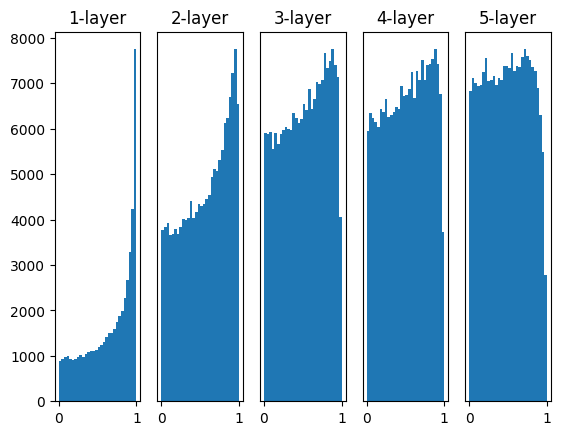

In [8]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-1))

def ReLU(x) :
    return np.maximum(0, x)

def tanh(x) :
    return np.tanh(x)

input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]

    # 여러 종류의 가중치 초기값
    # 표준편차 1인 정규분포
    # w = np.random.randn(node_num, node_num) * 1

    # 표준편차 0.01인 정규분포
    # w = np.random.randn(node_num, node_num) * 0.01

    # Xavier 초기값
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    # He 초기값
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성함수도 여러개
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items() :
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    
    if i != 0 : plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

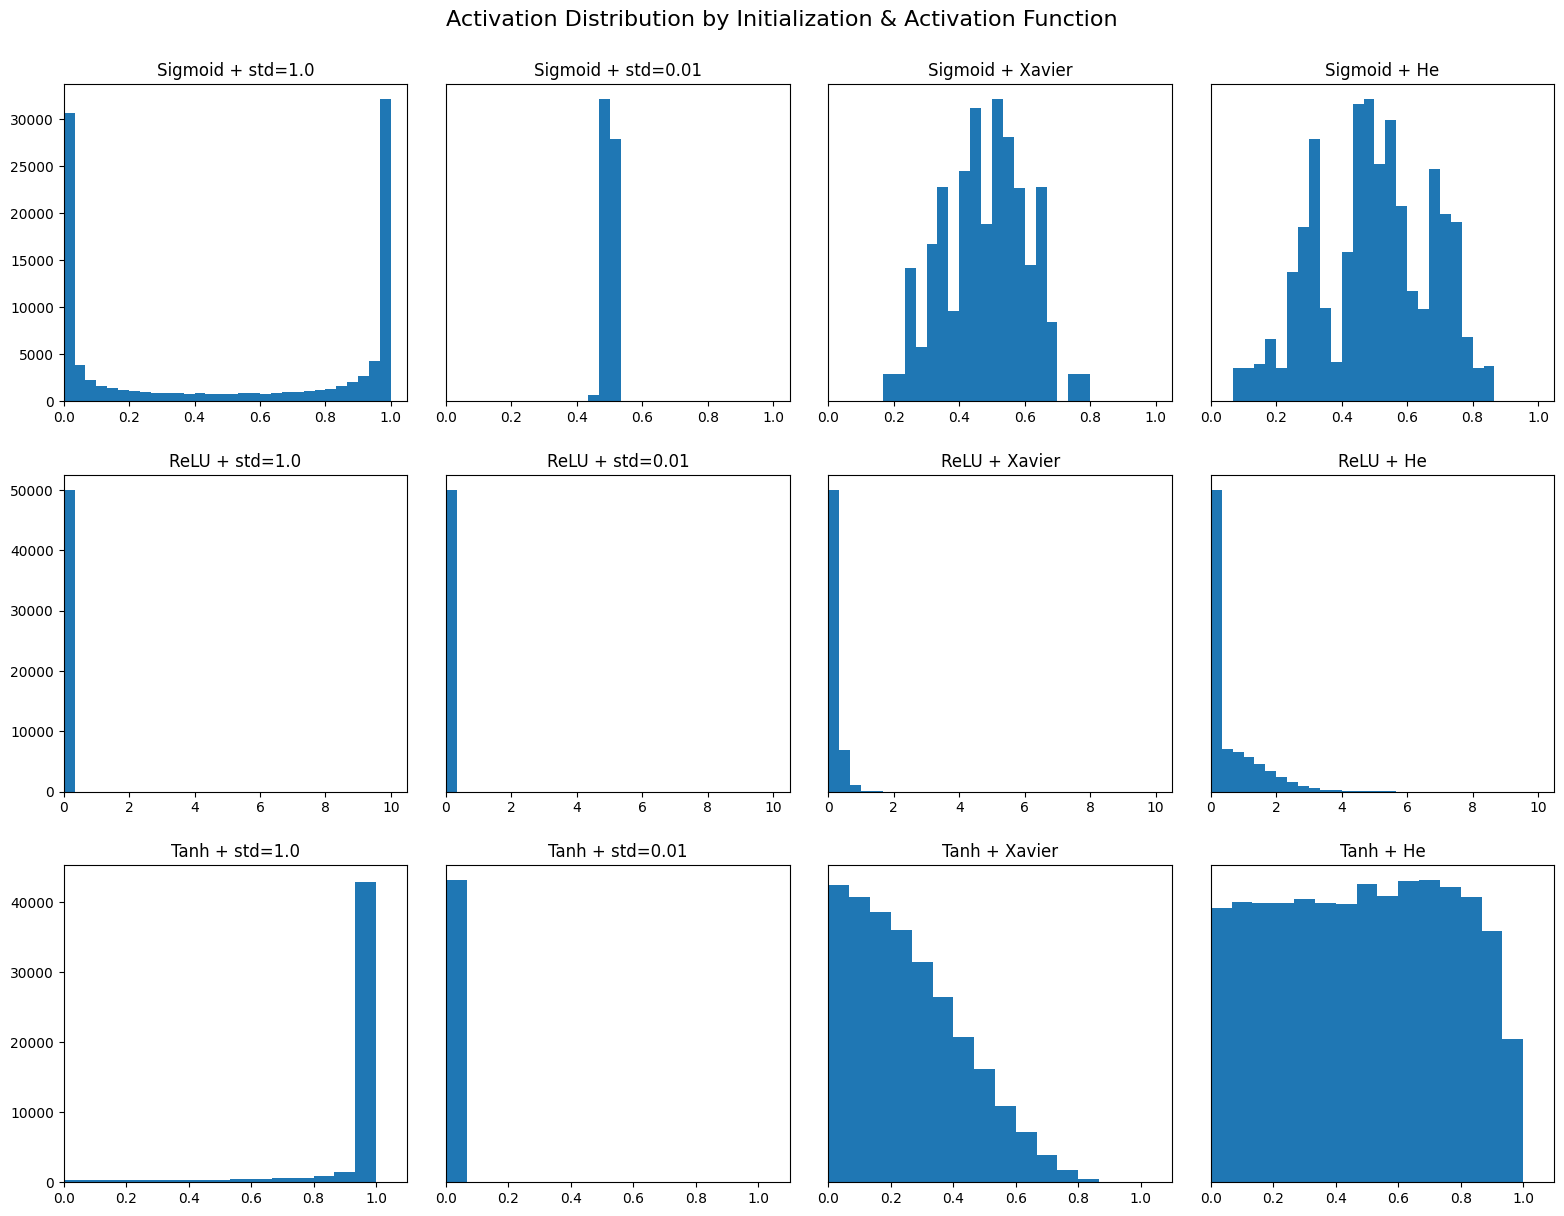

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# 설정
input_data = np.random.randn(1000, 100)  # 입력 데이터
node_num = 100
hidden_layer_size = 5
activations = {}

# 가중치 초기화 기법 정의
init_methods = {
    'std=1.0': lambda: np.random.randn(node_num, node_num) * 1.0,
    'std=0.01': lambda: np.random.randn(node_num, node_num) * 0.01,
    'Xavier': lambda: np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num),
    'He': lambda: np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
}

# 활성화 함수 정의
act_functions = {
    'Sigmoid': sigmoid,
    'ReLU': relu,
    'Tanh': tanh
}

# 전체 그림 설정
total_plots = len(init_methods) * len(act_functions)
cols = len(init_methods)
rows = len(act_functions)
plt.figure(figsize=(4 * cols, 4 * rows))

plot_idx = 1

# 모든 조합 실행
for act_name, act_func in act_functions.items():
    for init_name, init_func in init_methods.items():
        
        x = input_data
        activations = {}
        
        # 5층 네트워크 forward
        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i-1]
            
            w = init_func()           # 가중치 초기화
            a = np.dot(x, w)          # 선형 변환
            z = act_func(a)           # 활성화 함수
            activations[i] = z
        
        # 서브플롯 생성
        plt.subplot(rows, cols, plot_idx)
        plt.title(f'{act_name} + {init_name}', fontsize=12)
        
        # 마지막 층의 활성화값만 시각화 (또는 모든 층 평균)
        last_layer = activations[hidden_layer_size-1]
        
        # 히스토그램 범위 자동 조정
        if 'Sigmoid' in act_name:
            plt.hist(last_layer.flatten(), 30, range=(0, 1))
        elif 'Tanh' in act_name:
            plt.hist(last_layer.flatten(), 30, range=(-1, 1))
        else:  # ReLU
            plt.hist(last_layer.flatten(), 30, range=(0, 10))
        
        plt.xlim(left=0)
        if plot_idx % cols != 1:
            plt.yticks([])
        
        plot_idx += 1

plt.tight_layout(pad=2.0)
plt.suptitle('Activation Distribution by Initialization & Activation Function', 
             fontsize=16, y=1.02)
plt.show()

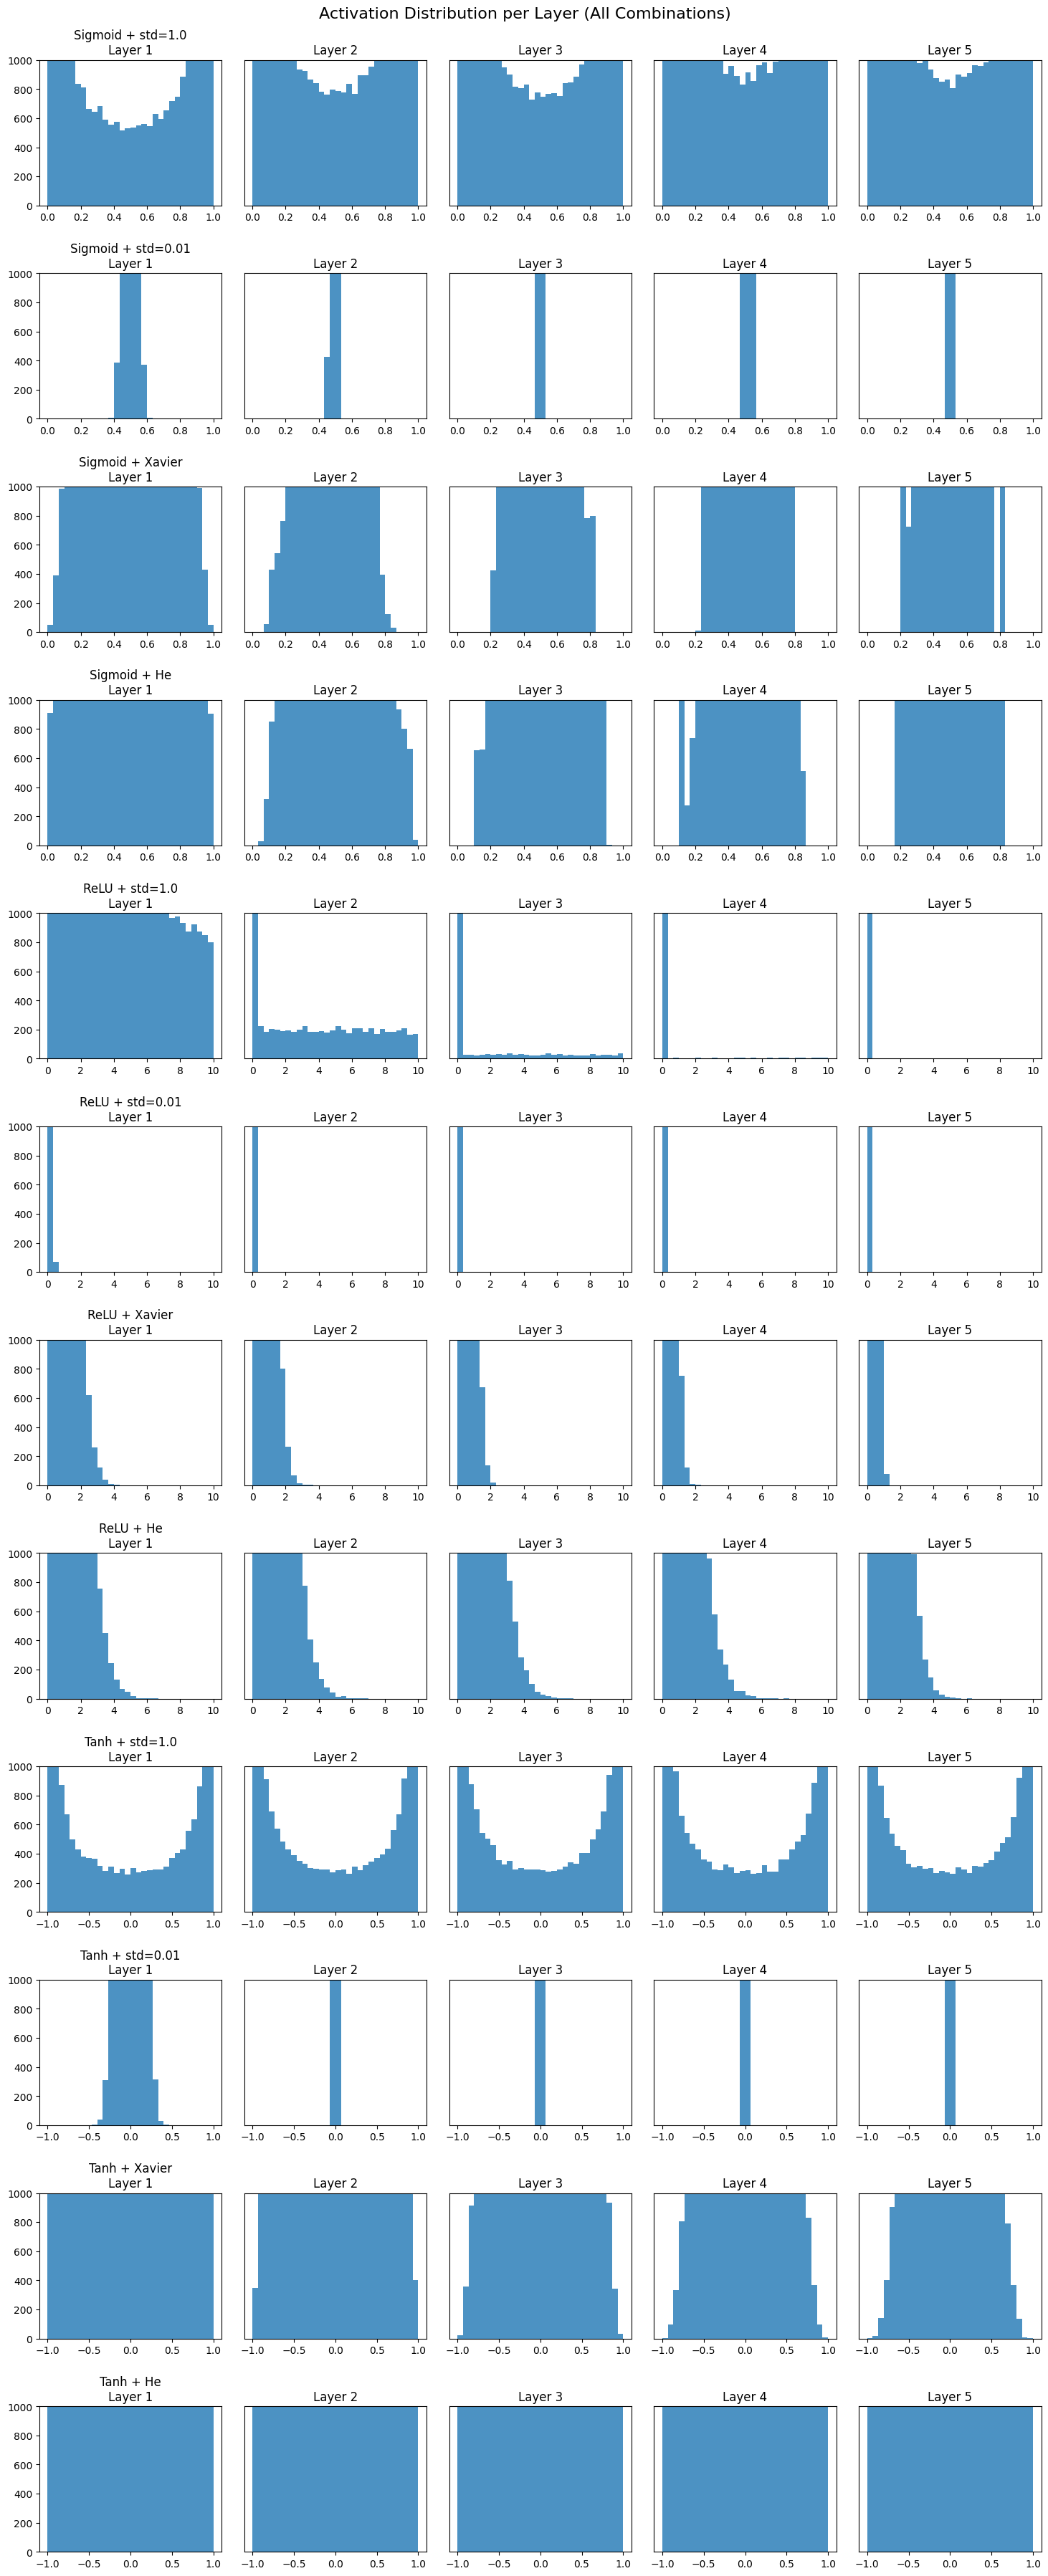

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수
def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x):    return np.maximum(0, x)
def tanh(x):    return np.tanh(x)

# 설정
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5

# 초기화 방법
init_methods = {
    'std=1.0':  lambda: np.random.randn(node_num, node_num) * 1.0,
    'std=0.01': lambda: np.random.randn(node_num, node_num) * 0.01,
    'Xavier':   lambda: np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num),
    'He':       lambda: np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
}

# 활성화 함수
act_functions = {
    'Sigmoid': (sigmoid, (0, 1)),
    'ReLU':    (relu,     (0, 10)),
    'Tanh':    (tanh,     (-1, 1))
}

# 전체 그림 설정
rows = len(act_functions) * len(init_methods)
cols = hidden_layer_size
plt.figure(figsize=(3 * cols, 3 * rows))

plot_idx = 1

# 모든 조합 실행
for act_name, (act_func, hist_range) in act_functions.items():
    for init_name, init_func in init_methods.items():
        
        x = input_data
        activations = {}
        
        # 5층 forward
        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i-1]
            w = init_func()
            a = np.dot(x, w)
            z = act_func(a)
            activations[i] = z
        
        # 한 줄에 5개 층 시각화
        for layer in range(hidden_layer_size):
            plt.subplot(rows, cols, plot_idx)
            
            if layer == 0:
                plt.title(f'{act_name} + {init_name}\nLayer {layer+1}')
            else:
                plt.title(f'Layer {layer+1}')
            
            if plot_idx % cols != 1:
                plt.yticks([])
            
            plt.hist(activations[layer].flatten(), bins=30, 
                     range=hist_range, alpha=0.8)
            plt.ylim(0, 1000)  # y축 통일
            
            plot_idx += 1

plt.tight_layout(pad=2.0)
plt.suptitle('Activation Distribution per Layer (All Combinations)', 
             fontsize=16, y=1.001)
plt.show()